**Title**: Relationship Between Player Expereince, Gender and Age and Average Playtime on a Minecraft Server.

**Introduction**:
Minecraft is a survival game set in a practically infinitely big world made up of voxels, it is one of the most popular video games of all time. At UBC, some researchers are trying to understand how individuals interact with video games using Minecraft. The researchers have set up an online server for people to play Minecraft on and are collecting data about every player. The researchers want to use this data to predict how their servers are being used, and in particular with this project, we will help the researchers by finding out which demographic of player is most likely to contribute the most data for the experiment. In particular, the question we will be answering is what is the experience level, gender and age of the players that will have the highest average play time. A KNN regression algorithm will be run to predict the type of person which will have the most amount of playtime based off these variables.

The dataset that we will be using for our answering our question and project will be ***players.csv***. The ***players.csv*** file has 196 observations and 9 variables which describe;
- The variable titled *experience* relates to the skill level or the experience of the player it is of variable type **Character** and has 5 possible values;
    Beginner
    Amateur
    Regular
    Pro
    Veteran
  
- how many hours that player has played(*played_hours*) **Double**
- each individual player’s encrypted email(*hashedEmail*) **Character**
- if the player has subscribed to receive emails from PlaiCraft(*subscribe*) **Logical**
- their gender(*gender*) **Character**
- age(*age*) **Double**
- in-game psuedo-name(*name*) **Character**
- every player’s individual ID(*individualID*) **Logical**
- every player’s organization(*organizationName*) **Logical**

In [1]:
library(tidyverse)
library(rsample)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

In [2]:
player_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
playerfile <- "players.csv"
download.file(url = player_url, destfile = playerfile, mode = "wb")

session_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessionfile <- "sessions.csv"
download.file(url = session_url, destfile = sessionfile, mode = "wb")

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [3]:
players_select <- select(players, experience, played_hours, gender, age)
players_select

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
⋮,⋮,⋮,⋮
Amateur,0.0,Prefer not to say,17
Amateur,2.3,Male,17
Pro,0.2,Other,91


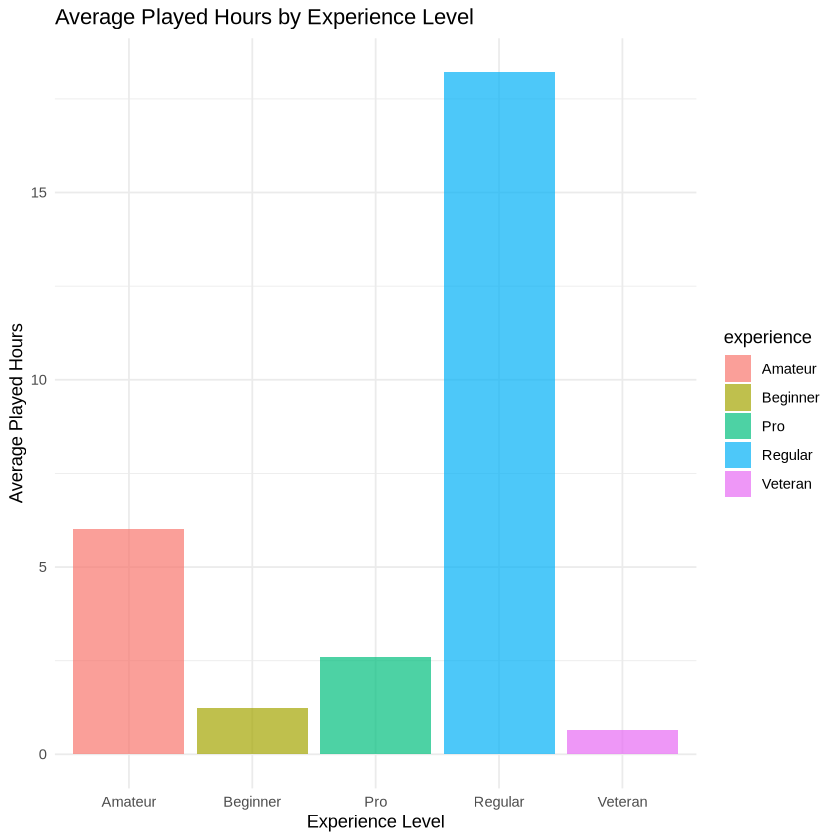

In [4]:
avg_played_experience <- players |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))

ggplot(avg_played_experience, aes(x = experience, y = mean_played_hours, fill = experience)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Average Played Hours by Experience Level",
    x = "Experience Level",
    y = "Average Played Hours") +
    theme_minimal()

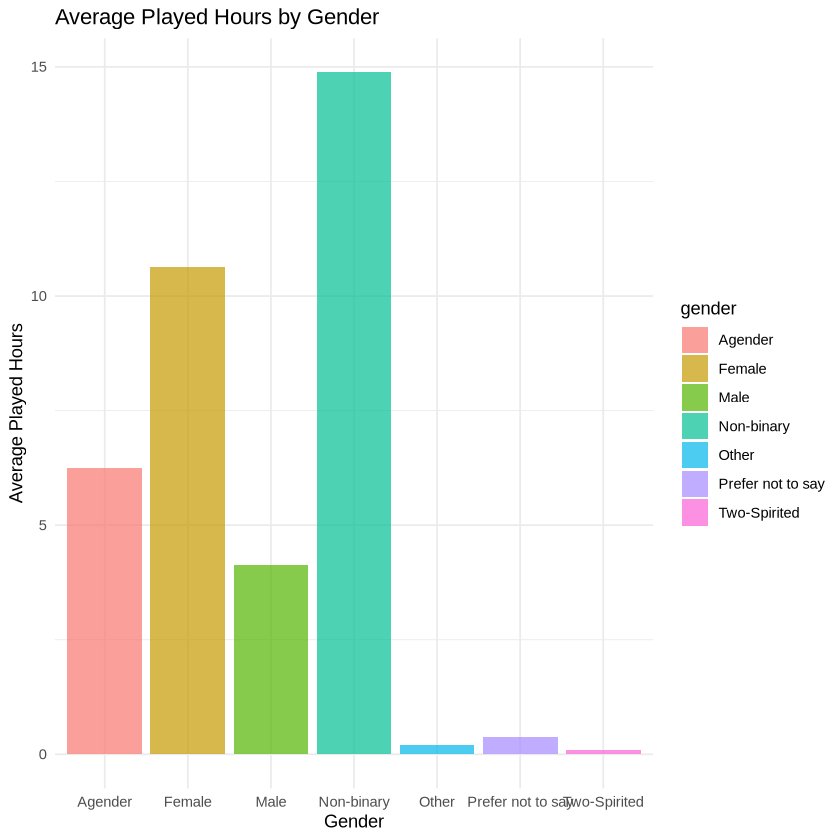

In [5]:
avg_played_gender <- players |>
    group_by(gender) |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))

ggplot(avg_played_gender, aes(x = gender, y = mean_played_hours, fill = gender)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Average Played Hours by Gender",
    x = "Gender",
    y = "Average Played Hours") +
    theme_minimal()

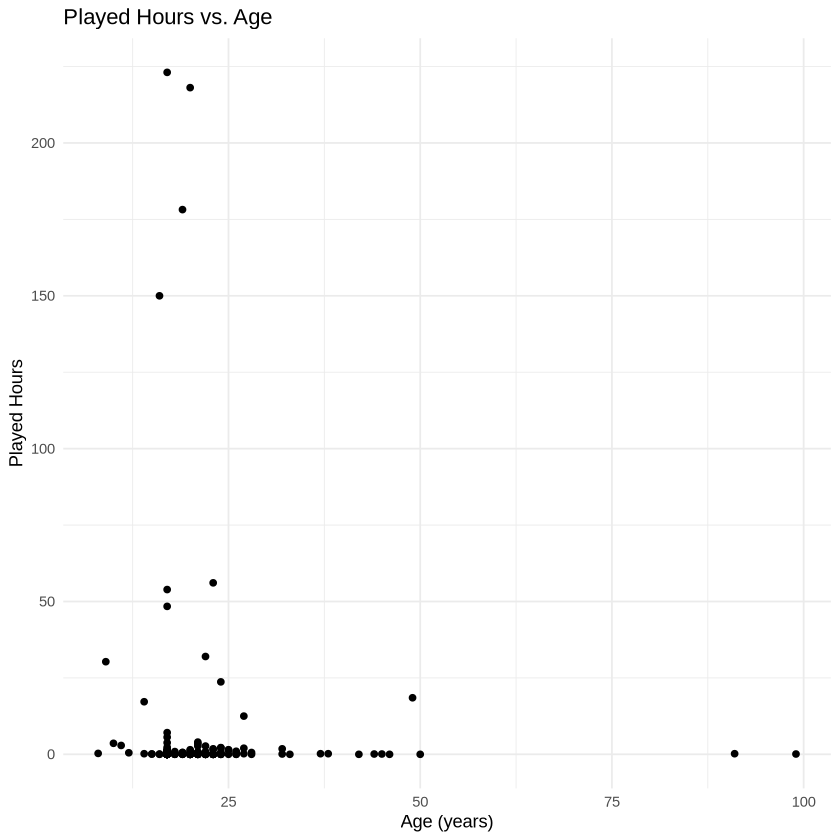

In [6]:
ggplot(players, aes(x = age, y = played_hours)) +
    geom_point() +
    labs(title = "Played Hours vs. Age",
    x = "Age (years)",
    y = "Played Hours") +
    theme_minimal()

In [7]:
players_select_ex_hours <- select(players_select, experience, played_hours)

#mutate to code experience into dummy numerical variable
players_select_ex_hours <- players_select_ex_hours |>
  mutate(experience_numeric = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Pro" ~ 4,
    experience == "Veteran" ~ 5
  ))

players_select_ex_hours <- select(players_select_ex_hours,played_hours,experience_numeric)
players_select_ex_hours

played_hours,experience_numeric
<dbl>,<dbl>
30.3,4
3.8,5
0.0,5
⋮,⋮
0.0,2
2.3,2
0.2,4


In [8]:
players_select_gender_hours <- select(players_select, gender, played_hours)

#mutate to code experience into dummy numerical variable
players_select_gender_hours <- players_select_gender_hours |>
  mutate(gender_numeric = case_when(
    gender == "Agender" ~ 1,
    gender == "Female" ~ 2,
    gender == "Male" ~ 3,
    gender == "Non_binary" ~ 4,
    gender == "Other" ~ 5,
    gender == "Prefer not to say" ~ 6,
    gender == "Two-Spirited" ~ 7,
  ))

players_select_gender_hours <- select(players_select_gender_hours,played_hours,gender_numeric)
players_select_gender_hours

played_hours,gender_numeric
<dbl>,<dbl>
30.3,3
3.8,3
0.0,3
⋮,⋮
0.0,6
2.3,3
0.2,5


In [9]:
set.seed(123)

# Split train and test for experience and player hours
ex_split <- initial_split(players_select_ex_hours, prop = 0.70, strata = played_hours)
ex_training <- training(ex_split)
ex_testing <- testing(ex_split)

In [10]:
# Split train and test for gender and player hours
gender_split <- initial_split(players_select_gender_hours, prop = 0.70, strata = played_hours)
gender_training <- training(gender_split)
gender_testing <- testing(gender_split)

In [11]:
players_select_age_hours <- select(players_select, age, played_hours)

# Split train and test for age and player hours
age_split <- initial_split(players_select_age_hours, prop = 0.70, strata = played_hours)
age_training <- training(age_split)
age_testing <- testing(age_split)

In [12]:
ex_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
                 set_engine("kknn") |>
                 set_mode("regression")
ex_recipe <- recipe(played_hours ~ experience_numeric, data = ex_training) |>
                   step_scale(all_predictors()) |>
                   step_center(all_predictors())
ex_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [13]:
ex_vfold <- vfold_cv(ex_training, v = 5, strata = played_hours)
ex_workflow <- workflow() |>
                     add_model(ex_spec) |>
                     add_recipe(ex_recipe)
ex_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [14]:
gridvals <- tibble(neighbors = seq(1, 81, by = 10))
ex_results <- ex_workflow |>
    tune_grid(resamples = ex_vfold, grid = gridvals) |>
    collect_metrics()
ex_results

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23.78767957,5,10.39300402,Preprocessor1_Model1
1,rsq,standard,0.04693509,3,0.02347522,Preprocessor1_Model1
11,rmse,standard,23.78191547,5,10.39260462,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
71,rsq,standard,0.05660444,5,0.020154607,Preprocessor1_Model8
81,rmse,standard,25.35086603,5,9.213876805,Preprocessor1_Model9
81,rsq,standard,0.01680297,5,0.003909677,Preprocessor1_Model9


In [15]:
ex_min <- ex_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
ex_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rmse,standard,23.78192,5,10.3926,Preprocessor1_Model2


In [16]:
ex_k_min <- ex_min |>
         pull(neighbors)

ex_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = ex_k_min) |>
                      set_engine("kknn") |>
                      set_mode("regression")

ex_best_fit <- workflow() |>
                    add_recipe(ex_recipe) |>
                    add_model(ex_best_spec) |>
                    fit(data = ex_training)

ex_summary <- ex_best_fit |>
                   predict(ex_testing) |>
                   bind_cols(ex_testing) |>
                   metrics(truth = played_hours, estimate = .pred)

ex_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,20.018881789
rsq,standard,0.002061476
mae,standard,3.932727273


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


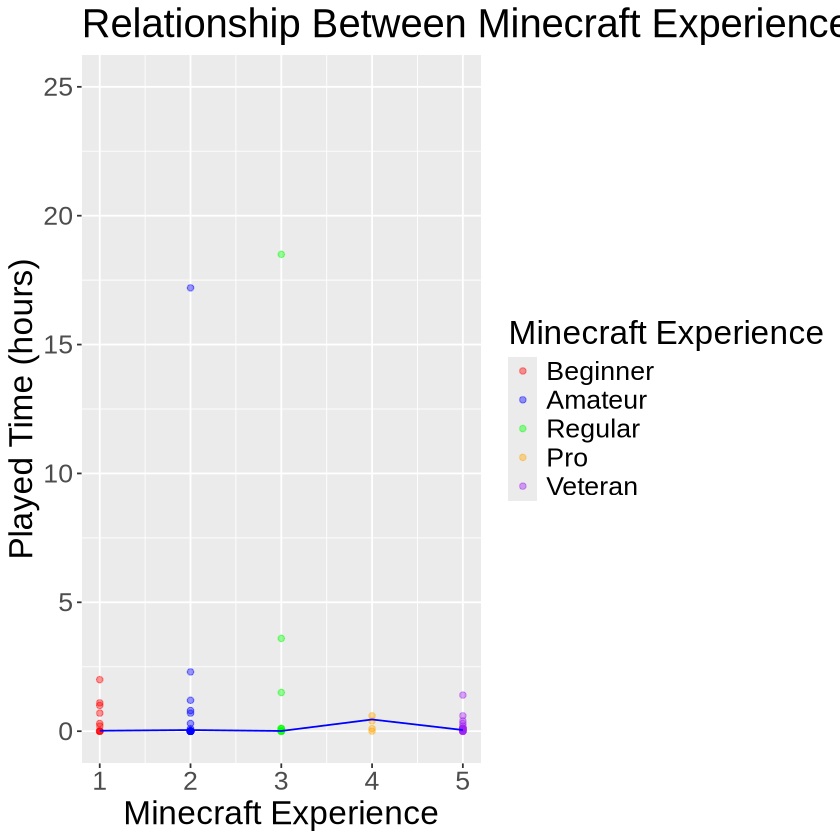

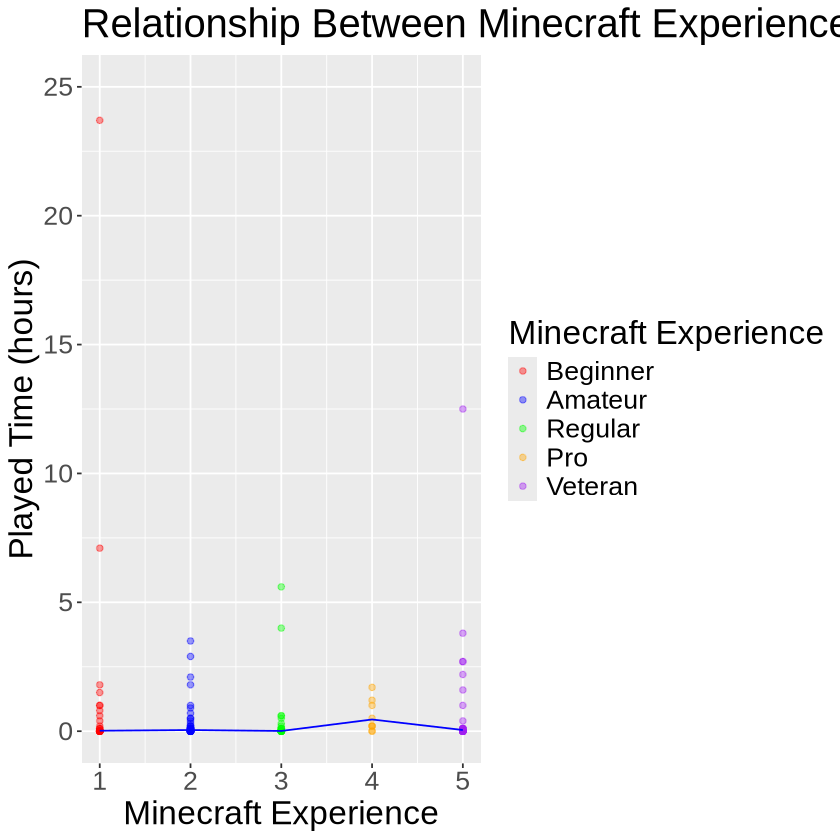

In [18]:
options(repr.plot.width = 7, repr.plot.height = 7)

# your code here
ex_preds <- ex_best_fit |>
                  predict(ex_training) |>
                  bind_cols(ex_training)

ex_preds_test <- ex_best_fit |>
                  predict(ex_testing) |>
                  bind_cols(ex_testing)

ex_testing_plot <- ggplot(ex_preds_test, aes(x = experience_numeric, y = played_hours)) +
  geom_point(aes(color = as.factor(experience_numeric)), alpha = 0.4) +  # Map color to experience_numeric
  xlab("Minecraft Experience") +
  ylab("Played Time (hours)") + 
  geom_line(data = ex_preds_test, aes(x = experience_numeric, y = .pred), color = "blue") +
  ggtitle("Relationship Between Minecraft Experience and Played Time (Testing)") +
  theme(text = element_text(size = 20)) +
  scale_y_continuous(limits = c(0, 25)) +
  scale_color_manual(
    name = "Minecraft Experience",  # Legend title
    values = c("1" = "red",         # Map dummy values to colors
               "2" = "blue",
               "3" = "green",
               "4" = "orange",
               "5" = "purple"),
    labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")  # Legend labels
  )

ex_training_plot <- ggplot(ex_preds, aes(x = experience_numeric, y = played_hours)) +
  geom_point(aes(color = as.factor(experience_numeric)), alpha = 0.4) +  # Map color to experience_numeric
  xlab("Minecraft Experience") +
  ylab("Played Time (hours)") + 
  geom_line(data = ex_preds, aes(x = experience_numeric, y = .pred), color = "blue") +
  ggtitle("Relationship Between Minecraft Experience and Played Time") +
  theme(text = element_text(size = 20)) +
  scale_y_continuous(limits = c(0, 25)) +
  scale_color_manual(
    name = "Minecraft Experience",  # Legend title
    values = c("1" = "red",         # Map dummy values to colors
               "2" = "blue",
               "3" = "green",
               "4" = "orange",
               "5" = "purple"),
    labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")  # Legend labels
  )

ex_testing_plot
ex_training_plot